<a href="https://colab.research.google.com/github/ParsaMohammadpour/Graph-1st-Assignment/blob/main/charles_darwin_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install networkx

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx
import random

# Making Dictionary

In [3]:
words = {}
with open('Text-2.txt') as f:
    for line in f:
        # removing All nan alphabetic and numeric characters
        edited_line =  re.sub(r'[^\w\s]', ' ', line)
        for word in edited_line.split():
            if word in words.keys():
                words[word] = words[word] + 1
            else:
                words[word] = 0 + 1

# Making Dataframe

In [4]:
df = pd.DataFrame(list(words.items()), columns=['word', 'frequency'])
df

,word,frequency
0,note,6
1,this,1010
2,book,1
3,can,520
4,be,1684
...,...,...
8051,zooids,2
8052,corals,1
8053,medus,1
8054,individuality,1


# Sorting Dataframe (Part1)

In [5]:
df = df.sort_values("frequency", ascending=False)
df['rank'] = df['frequency'].rank(ascending=False)
df

,word,frequency,rank
7,the,10955,1.0
15,of,7841,2.0
79,and,4567,3.0
30,in,4165,4.0
91,to,3720,5.0
...,...,...,...
4859,degenerated,1,6498.0
4863,coarse,1,6498.0
4866,abnormally,1,6498.0
4872,adduce,1,6498.0


# Drawing Charts

### Simple Plots

<Axes: xlabel='rank'>

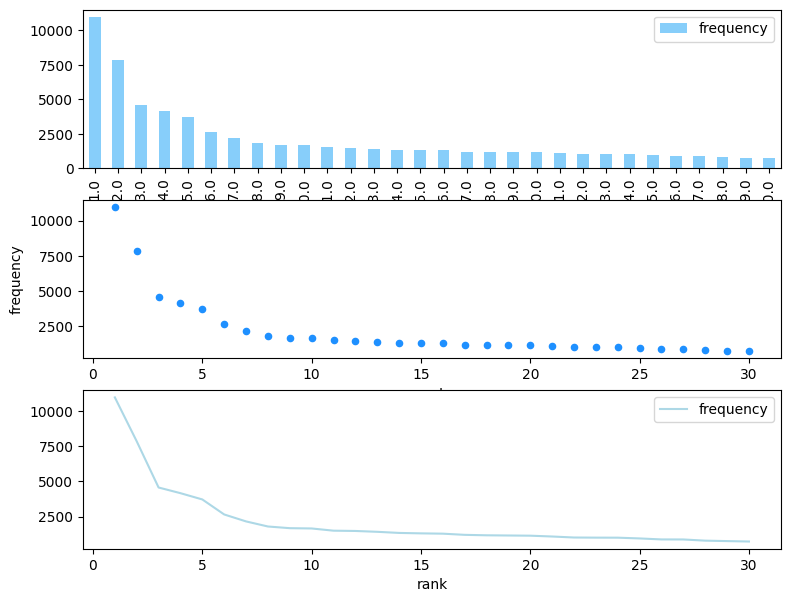

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))

df[:30].plot(x ='rank', y='frequency', kind='bar', color=['lightskyblue'], ax=ax1)
df[:30].plot(x ='rank', y='frequency', kind='scatter', color=['dodgerblue'], ax=ax2)
df[:30].plot(x ='rank', y='frequency', kind='line', color=['lightblue'], ax=ax3)

<Axes: xlabel='word', ylabel='frequency'>

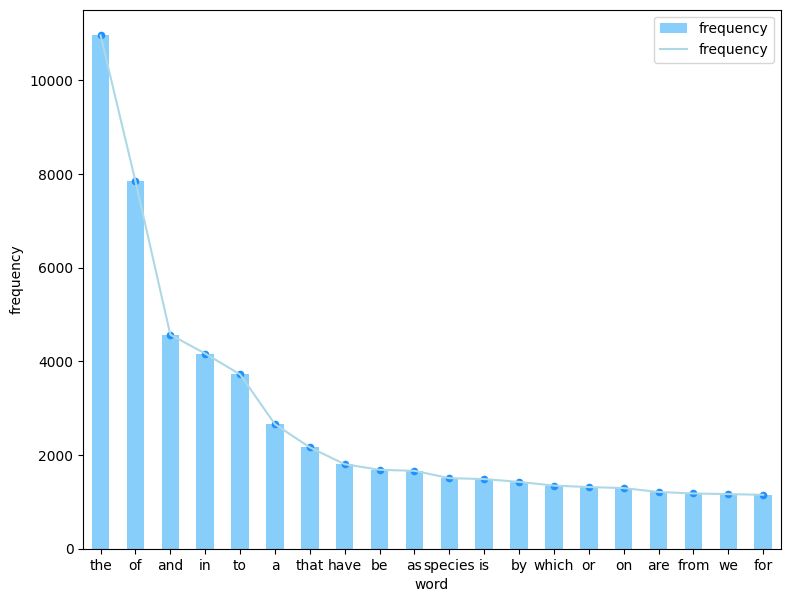

In [7]:
fig, ax = plt.subplots(figsize=(9,7))

df[:20].plot(x ='word', y='frequency', kind='bar', color=['lightskyblue'], ax=ax)
df[:20].plot(x ='word', y='frequency', kind='scatter', color=['dodgerblue'], ax=ax)
df[:20].plot(x ='word', y='frequency', kind='line', color=['lightblue'], ax=ax)

<Axes: xlabel='rank', ylabel='frequency'>

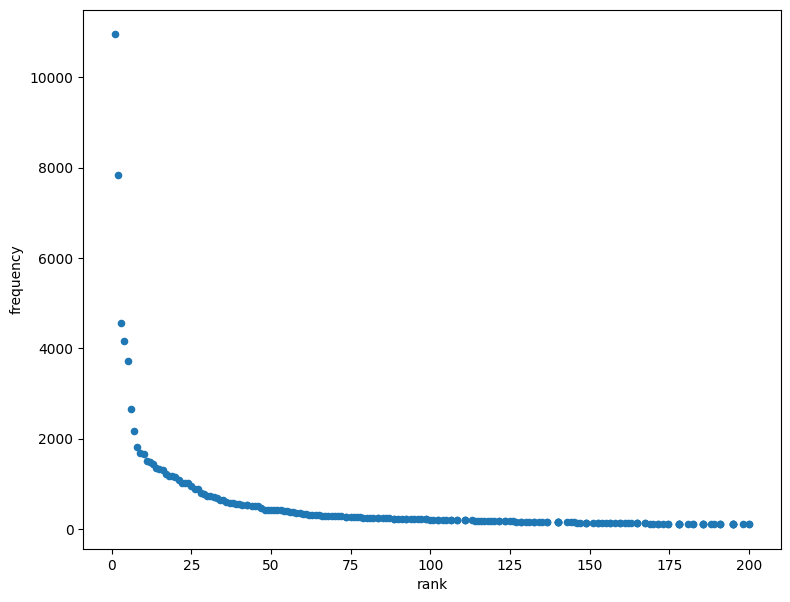

In [8]:
df[:200].plot(x ='rank', y='frequency', kind='scatter', figsize=(9,7))

### Log - Log Plots

#### first 200 words

<Axes: xlabel='rank'>

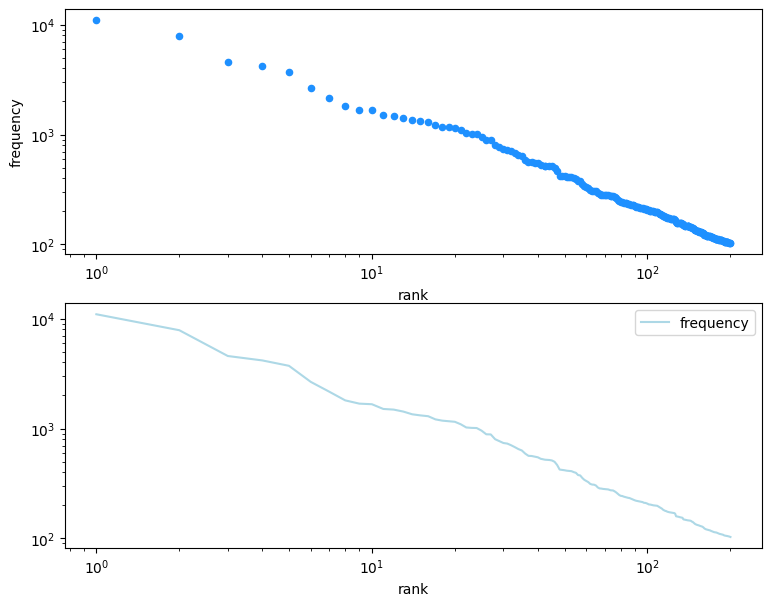

In [9]:
fig, axes = plt.subplots(2, figsize=(9,7))
for ax in axes:
  ax.set_xscale('log')
  ax.set_yscale('log')
(ax1, ax2) = axes

df[:200].plot(x ='rank', y='frequency', kind='scatter', color=['dodgerblue'], ax=ax1)
df[:200].plot(x ='rank', y='frequency', kind='line', color=['lightblue'], ax=ax2)

#### All words

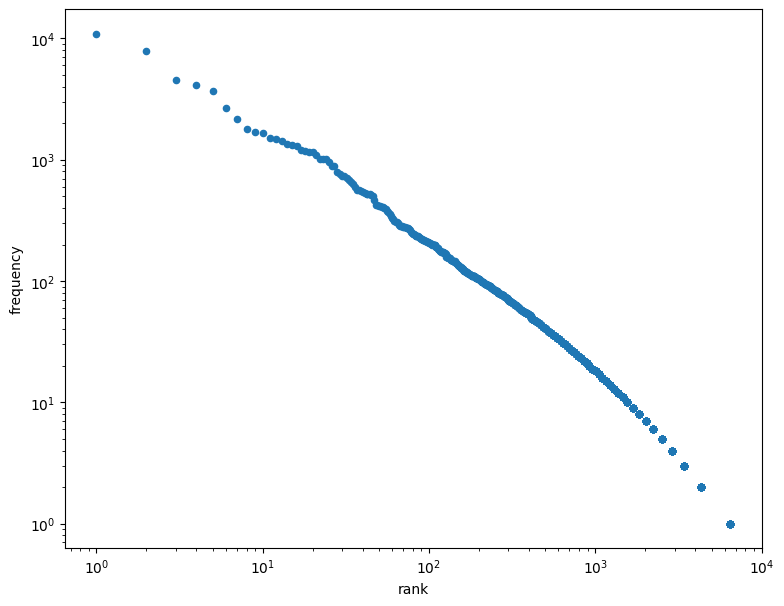

In [10]:
df.plot(x ='rank', y='frequency', kind='scatter', figsize=(9,7))
plt.xscale('log')
plt.yscale('log')

# Graphs

### Degree distribution functions

In [11]:
def get_degree_distribution(graph: nx.Graph) -> np.array:
  return np.array(sorted((d for n, d in graph.degree()), reverse=True))

def draw_graph_detail(graph: nx.Graph, graph_name:str, circular:bool=False) -> None:
  degree_sequence = get_degree_distribution(graph)
  dmax = max(degree_sequence)

  fig = plt.figure(f"Degree of a {graph_name} graph", figsize=(9, 9))
  # Create a gridspec for adding subplots of different sizes
  axgrid = fig.add_gridspec(5, 4)

  ax0 = fig.add_subplot(axgrid[0:3, :])
  pos = nx.circular_layout(graph) if circular else nx.spring_layout(graph)
  nx.draw_networkx_nodes(graph, pos, ax=ax0, node_size=20)
  nx.draw_networkx_edges(graph, pos, ax=ax0, alpha=0.4)
  ax0.set_title(f"{graph_name} Graph")
  ax0.set_axis_off()

  ax1 = fig.add_subplot(axgrid[3:, :2])
  ax1.plot(degree_sequence, "lightblue")
  ax1.scatter(list(range(len(degree_sequence))), degree_sequence, color="dodgerblue")
  ax1.set_title("Degree Rank Plot")
  ax1.set_ylabel("Degree")
  ax1.set_xlabel("Rank")

  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(*np.unique(degree_sequence, return_counts=True), color='lightblue')
  ax2.set_title("Degree histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")

  fig.tight_layout()
  plt.show()

def draw_log_log_ldegree_distribution(graph: nx.Graph) -> None:
  degree_sequence = get_degree_distribution(graph)

  plt.figure(figsize=(5, 5))
  plt.scatter(*np.unique(degree_sequence, return_counts=True), color='dodgerblue')
  plt.plot(*np.unique(degree_sequence, return_counts=True), color='lightblue')
  plt.title('log-log degree distribution')
  plt.xlabel('Degree')
  plt.ylabel('# of nodes')
  plt.xscale('log')
  plt.yscale('log')
  plt.show()

### Small World Graph

#### graph

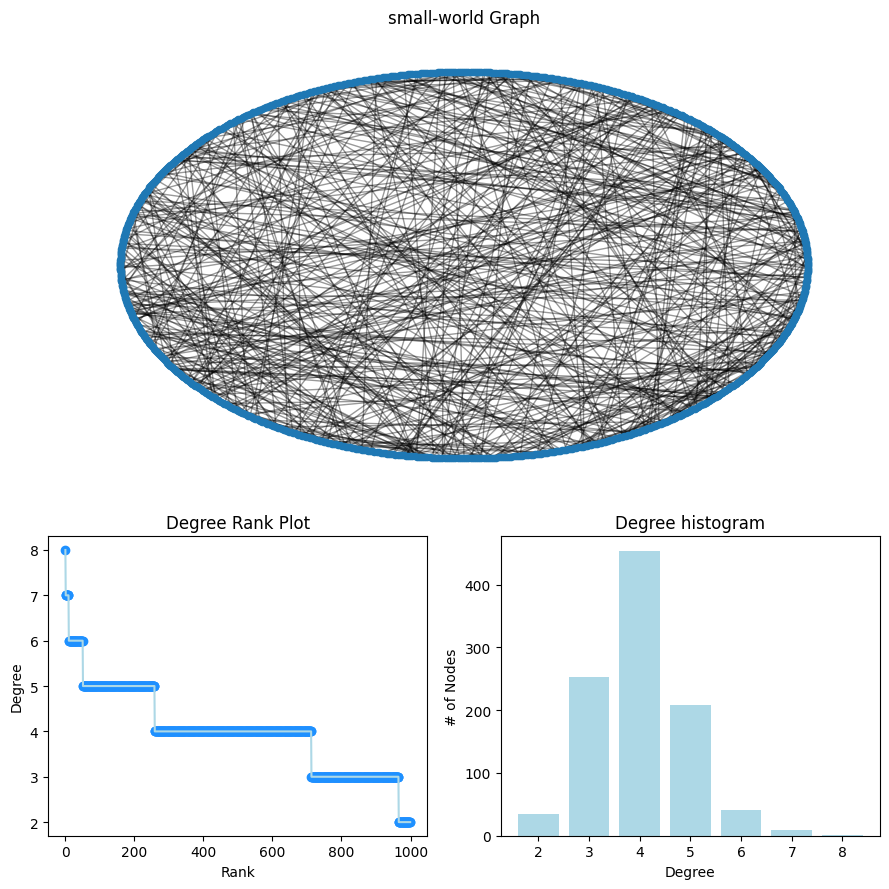

In [12]:
# Simple Example oF Correct Small World Graph
G = nx.watts_strogatz_graph(n=1000, k=4, p=0.25)
# if we want a connected graph we should use this:
# G = nx.connected_watts_strogatz_graph(n=10, m=4, p=0.5, t=20)
draw_graph_detail(G, 'small-world', True)

###### log-log degree distribution

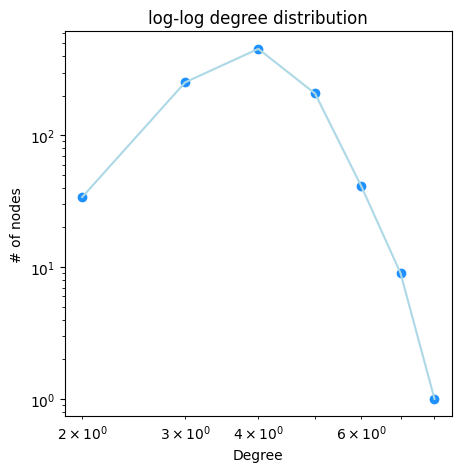

In [13]:
draw_log_log_ldegree_distribution(G)

### Erdos - Renyi

#### Graph

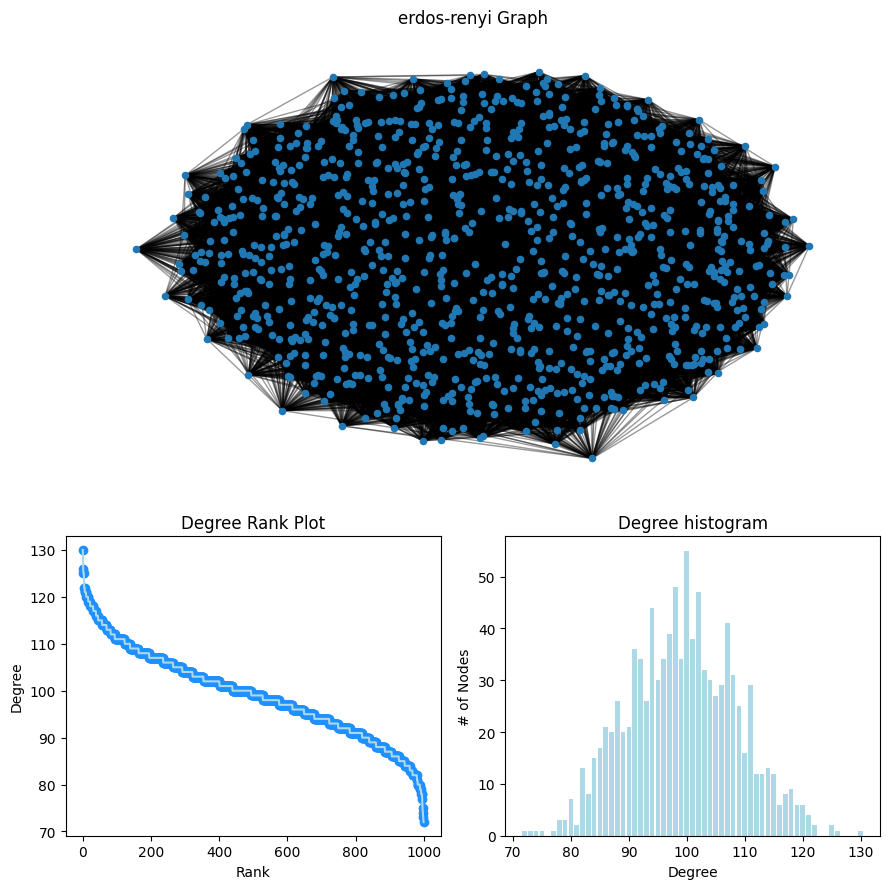

In [14]:
G = nx.erdos_renyi_graph(1000, 0.1)

draw_graph_detail(G, 'erdos-renyi')

#### log - log degree distribution

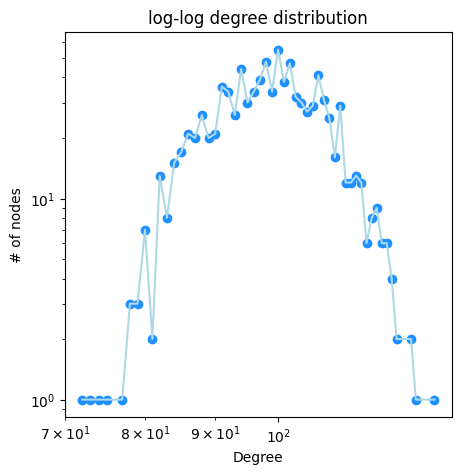

In [15]:
draw_log_log_ldegree_distribution(G)

### Barabasi - albert

#### Graph

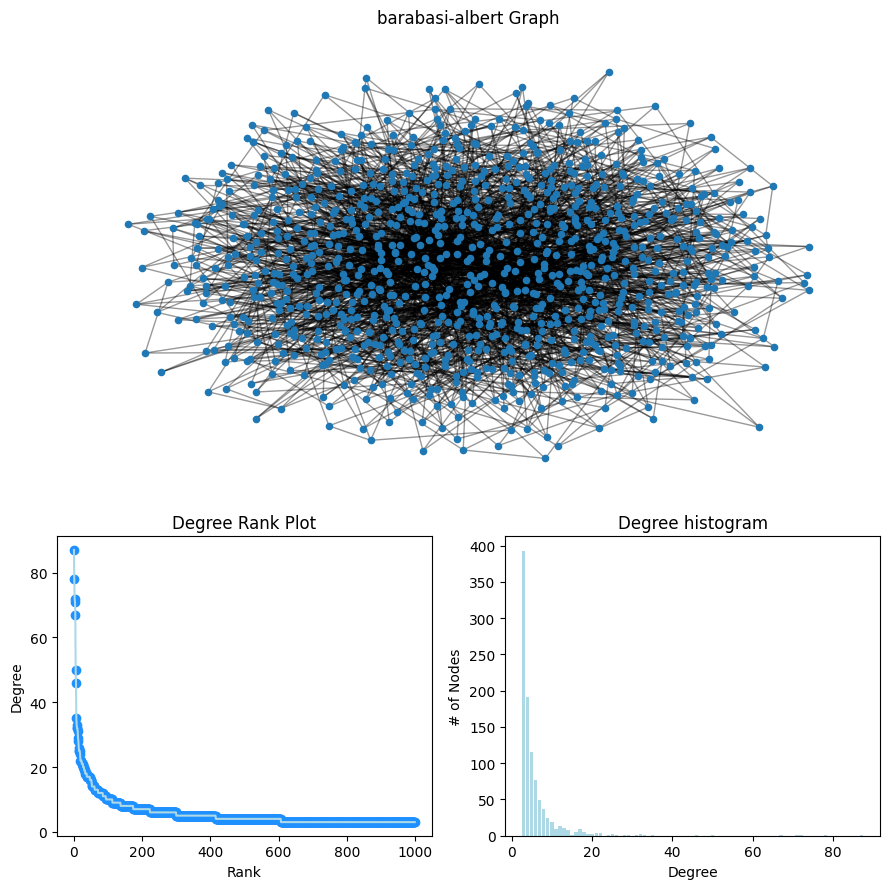

In [16]:
G = nx.barabasi_albert_graph(1000, 3)

draw_graph_detail(G, 'barabasi-albert')

###### log-log degree distribution

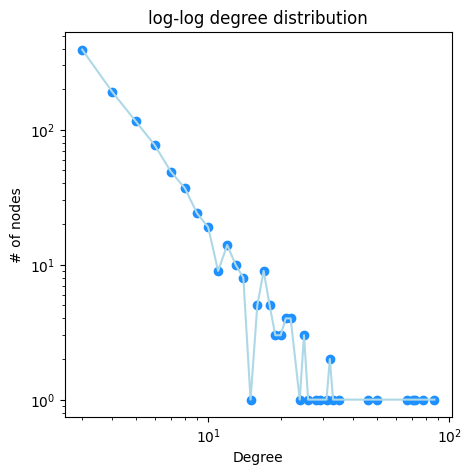

In [17]:
draw_log_log_ldegree_distribution(G)